<h1><font color='blue'>Projet 5<br />
    Segmentez des clients d'un site e-commerce</h1><br />
   
<font color='blue'>Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne souhaite obtenir une segmentation de ses clients utilisable au quotidien par leur équipe marketing dans leurs campagnes de communication.

<font color='blue'>Objectifs :

<font color='blue'>* Comprendre les différents types d'utilisateurs grâce à leur comportement 

<font color='blue'>* Fournir à Olist une segmentation de ses clients avec une description actionnable de cette segmentation et sa logique sous-jacente

<font color='blue'>* Fournir à Olist une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps

Ce premier notebook est dédié à l'exploration, le nettoyage et l'analyse des données nous permettant de déterminer les variables pertinentes pour la segmentation. 



Le jeu de données fourni dans 8 fichiers séparés renseignant les informations suivantes : clients_id, produits, prix, évaluation, nombre d'articles, poids, description, géolocalisation, etc.. et un 9eme qui contient la traduction des produits en anglais. Ces fichiers sont liés entre eux par une ou plusieurs variables comme illustré sur le schéma ci-dessous du site kaggle de Olist. Au total, il y a environ 100k commandes passées entre 2016 à 2018 chez plusieurs enseignes au Brésil. 

Pour plus d'informations sur les données : https://www.kaggle.com/olistbr/brazilian-ecommerce


![title](https://i.imgur.com/HRhd2Y0.png)

## Chargement des librairies

In [144]:
%matplotlib inline

import matplotlib as mpl
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 15})


## Importer les fichiers

## les clients

In [4]:
df_clients = pd.read_csv('olist_customers_dataset.csv')

In [5]:
df_clients.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Différence entre customer_id and customer_unique_id?    
Dans le sataset olist pour chaque ordre est assigné un customer_id. Donc le meme client peut avoir différent customer_id pour différents ordre. customer_unique_id est le id unique de client pour tous ces achats

In [33]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [34]:
df_clients.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [35]:
# Nombre de villes
number_city = df_clients["customer_city"].nunique()
# Nombre d'Etats
number_states = df_clients["customer_state"].nunique()
# Nombre de consommateurs
number_customers = df_clients["customer_unique_id"].nunique()

print("Dans le fichier client :") 
print(f"Le nombre d'états est : {number_states}")
print(f"Le nombre de villes est : {number_city}")
print(f"Le nombre de clients est : {number_customers}")

Dans le fichier client :
Le nombre d'états est : 27
Le nombre de villes est : 4119
Le nombre de clients est : 96096


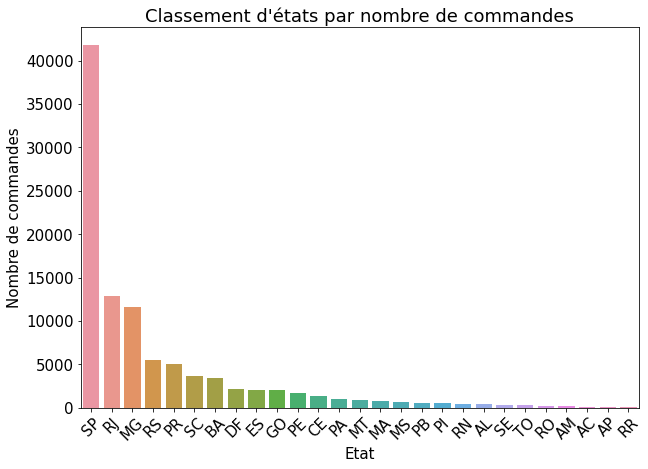

In [21]:
fig = plt.figure(figsize=(10, 7))


sns.countplot(data=df_clients, x="customer_state",  order = df_clients['customer_state'].value_counts().index)
plt.title("Classement d'états par nombre de commandes")
plt.xlabel('Etat')
plt.ylabel('Nombre de commandes')

plt.xticks(rotation=45)
None 
plt.savefig('order per state', dpi=200, bbox_inches='tight') 

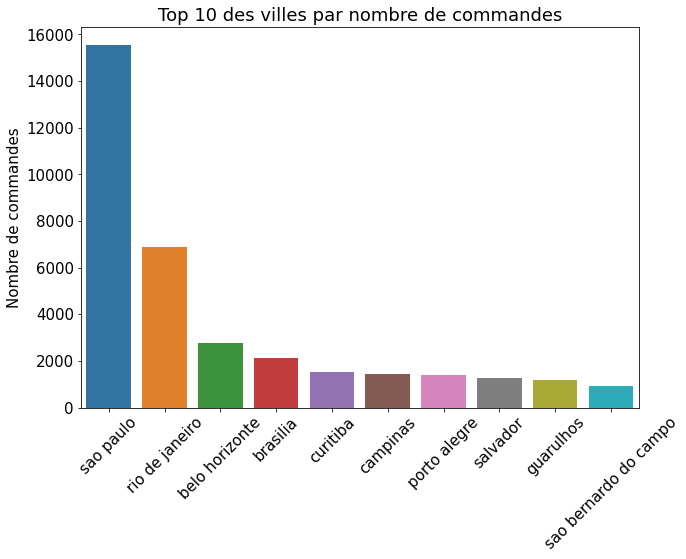

In [37]:
fig = plt.figure(figsize=(10, 7))


sns.countplot(data=df_clients, x="customer_city",  order = df_clients['customer_city'].value_counts().index[:10])

plt.xlabel('')
plt.ylabel('Nombre de commandes')
plt.title('Top 10 des villes par nombre de commandes')
plt.xticks(rotation=45)
None 
plt.savefig('top 10 order per ville', dpi=200, bbox_inches='tight') 

La majorité de commandes sont placées dans l'état de São Paulo (la plus grande ville São Paulo) suivi de Rio de Janeiro ((la plus grande ville Rio de Janeiro). En gros, la majorité de commandes sont placées dans les villes les plus peuplées (image ci-dessous issue du site 'fr.statista.com'). Qu'on est il des vendeurs?

<div>
<img src="pop villes brezil.png", width="500"/>
</div>



## Sellers

In [7]:
df_sellers = pd.read_csv("olist_sellers_dataset.csv")

In [8]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [40]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


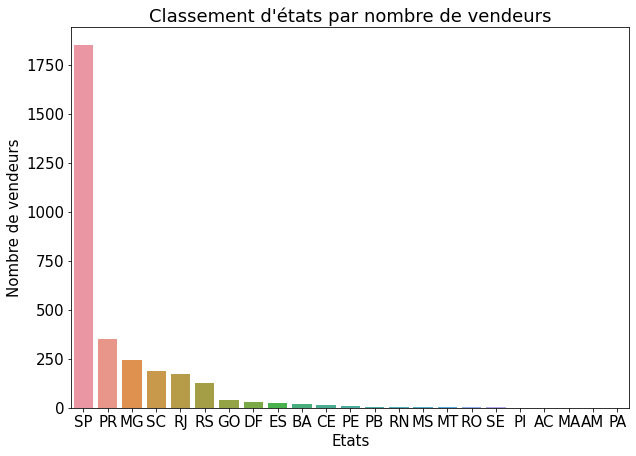

In [10]:
fig = plt.figure(figsize=(10, 7))


sns.countplot(data=df_sellers, x="seller_state",  order = df_sellers['seller_state'].value_counts().index)
plt.title("Classement d'états par nombre de vendeurs")
plt.xlabel('Etats')
plt.ylabel('Nombre de vendeurs')
plt.savefig('sellers per state', dpi=200, bbox_inches='tight') 

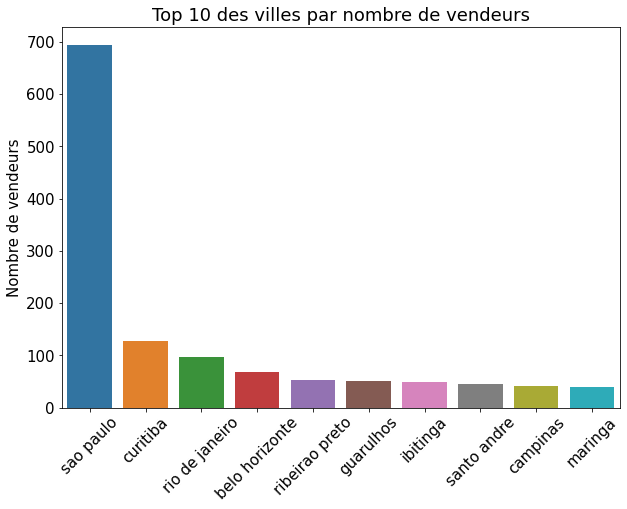

In [11]:
fig = plt.figure(figsize=(10, 7))


sns.countplot(data=df_sellers, x="seller_city",  order = df_sellers['seller_city'].value_counts().index[:10])

plt.xlabel('')
plt.ylabel('Nombre de vendeurs')
plt.title('Top 10 des villes par nombre de vendeurs')
plt.xticks(rotation=45)
None 
plt.savefig('top 10 seller per ville', dpi=200, bbox_inches='tight') 

Le nombre de vendeurs comme celui d'acheteurs est dans l'état la plus peuplée de São Paulo. Concorde avec les états ou il y a plus d'acheteurs aussi. 

## Les données de géolocalisation

In [13]:
df_geo = pd.read_csv("olist_geolocation_dataset.csv")

In [14]:
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [15]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
#drop the duplicate info 

df_geo[df_geo.duplicated(keep=False)]
print(f"Number of rows before dropping duplicates  : {len(df_geo)}" )
df_geo.drop_duplicates(keep="first",inplace=True)
print(f"Number of rows after dropping duplicates  : {len(df_geo)}")

Number of rows before dropping duplicates  : 1000163
Number of rows after dropping duplicates  : 738332


In [48]:
df_geo.groupby('geolocation_zip_code_prefix')['geolocation_city'].nunique().sort_values(ascending=False).head(10)

geolocation_zip_code_prefix
13457    5
6900     5
17970    5
28950    5
13455    5
13454    5
78290    5
42850    5
13318    5
71015    4
Name: geolocation_city, dtype: int64

Comment avoir le meme code postale pour plusieurs villes ? et états ? 
Apres vérification pour les villes, parfois elles sont écrites de maniere différente donc probleme de caracteres seulement. Sauf qu'en epluchant les données, plusieurs codes postales sont assignés au meme ville!
pour les états c'est encore plus compliqué : on a des codes postales assignés a plusieurs états (un exemple ci-dessous) 

In [17]:
print(df_geo.loc[df_geo['geolocation_zip_code_prefix']==65340]['geolocation_city'].unique())
print(df_geo.loc[df_geo['geolocation_zip_code_prefix']==21550]['geolocation_state'].unique())

['conceicao do lago-acu' 'conceição do lago-açu']
['RJ' 'AC']


les zipcodes ne sont pas uniques on ne peut pas localiser les clients avec les zipcodes. 

Il y a des outliers, quelques uns correspondent aux iles brésiliens mais pour les autres justes des outliers. Je procede a les éliminer. Le territoire brésilien s'étend sur 4 395 km du Nord au Sud (5°16'20" Nord à 33°44'32" Sud de latitude) et 4 319 km d'Est en Ouest (34°47'30" Ouest à 73°59'32" Ouest de longitude)

In [18]:
# Removing some outliers
# Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude
df_geo = df_geo[df_geo.geolocation_lat <= 5.27438888]
# it’s most Western spot is at 73 deg, 58′ 58.19″W Long
df_geo = df_geo[df_geo.geolocation_lng >= -73.98283055]
# It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude
df_geo = df_geo[df_geo.geolocation_lat >= -33.75116944]
# It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
df_geo = df_geo[df_geo.geolocation_lng <= -34.79314722]

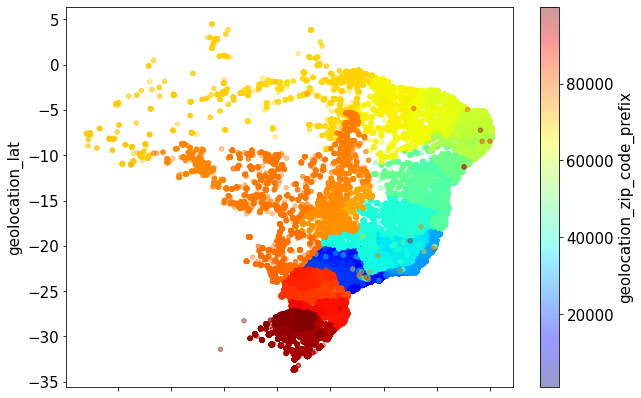

In [19]:
# Affichage graphique des zip_code_prefix,
# des latitudes et longitudes associées
df_geo.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat",
         alpha=0.4, c="geolocation_zip_code_prefix",
         cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10, 7))
plt.savefig('graphique des zip_code_prefix', dpi=200, bbox_inches='tight') 


### Nous avons des chevauchements dans les codes postaux ce qui n'est pas normal!!

## Les commandes clients

In [22]:
df_orders_it = pd.read_csv("olist_order_items_dataset.csv")

In [23]:
df_orders_it.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


price and fright_value sont données pour 1 item. il faut multiplier par order_item_id pour obtenir le prix total et pareil pour freight

In [24]:
df_orders_it.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [25]:
df_orders_it[df_orders_it.duplicated(keep = False)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


Pas de doublons dans le fichier. Vérifions s'il y a des doublons de commandes

In [26]:
dup_order_id=df_orders_it[df_orders_it['order_id'].duplicated(keep = False)].sort_values(by ='order_id')
print(len(dup_order_id))
dup_order_id.head(15)

23787


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
42,001ab0a7578dd66cd4b0a71f5b6e1e41,1,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
49,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78
48,001d8f0e34a38c37f7dba2a37d4eba8b,1,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78


In [27]:
dup_order_prod = df_orders_it[df_orders_it[['order_id','product_id']].duplicated()]

On peut noter que : 

Pour la même commande (order_id), les produits achetés sont répartis un produit par ligne même s'il s'agit du même produit (product_id) acheté plusieurs fois. (order_item_id) est le numéro de produit/commande. C'est pourquoi on a des doublons de (order_id), on a :
- le meme seller (seller_id)
- date de livraison est la meme (shipping_limit_date) 
- Idem pour le prix (price) et le fret (freight_value)

In [36]:
print(f"Nous avons  {len(dup_order_prod)} doublons de commandes avec les mêmes produits en quantité et {len(dup_order_id)-len(dup_order_prod)} doublons de commandes (order_id) avec différents produits")

Nous avons  10225 doublons de commandes avec les mêmes produits en quantité et 13562 doublons de commandes (order_id) avec différents produits


In [29]:
# Groupby product-id et order_id:

df_order_it_group_dup = df_orders_it\
    .groupby(by = ['order_id','product_id'], as_index=False)\
    .agg(quantity = ('order_item_id', 'count'), 
        seller_id=('seller_id', 'first'),
        shipping_limit_date=('shipping_limit_date', 'first'),
        price = ('price', 'first'),
        freight_value = ('freight_value', 'first')        
        )

In [30]:
df_order_it_group_dup

,order_id,product_id,quantity,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,1,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,1,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,1,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,1,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [31]:
# Checking if info was lost

print(f"Orders in grouped table: {len(df_order_it_group_dup['order_id'].unique())} \n\
Orders in original table: {len(df_orders_it['order_id'].unique())} \n\
products in grouped table: {len(df_order_it_group_dup['product_id'].unique())} \n\
products in old table: {len(df_orders_it['product_id'].unique())} \n\
Total quantity in grouped table: {df_order_it_group_dup['quantity'].sum()} \n\
Total quantity in old table: {len(df_orders_it)}")
    

Orders in grouped table: 98666 
Orders in original table: 98666 
products in grouped table: 32951 
products in old table: 32951 
Total quantity in grouped table: 112650 
Total quantity in old table: 112650


In [32]:
df_order_it_group_dup.loc[df_order_it_group_dup['order_id']=='87440e08790d85796f5b8bc9f5ed2707']

,order_id,product_id,quantity,seller_id,shipping_limit_date,price,freight_value
53900,87440e08790d85796f5b8bc9f5ed2707,38021cef829efa264df6f9d21c4df6e9,2,ce248b21cb2adc36282ede306b7660e5,2018-08-01 02:05:20,119.87,19.14
53901,87440e08790d85796f5b8bc9f5ed2707,d7a3cfa08519494aa1ad181e803617ec,2,e53d5b9b29d1218281f4a907ada18626,2018-08-02 02:05:20,23.03,19.14


In [33]:
df_order_it_group_dup['payment']=df_order_it_group_dup['price']*df_order_it_group_dup['quantity']
df_order_it_group_dup['freight']=df_order_it_group_dup['freight_value']*df_order_it_group_dup['quantity']

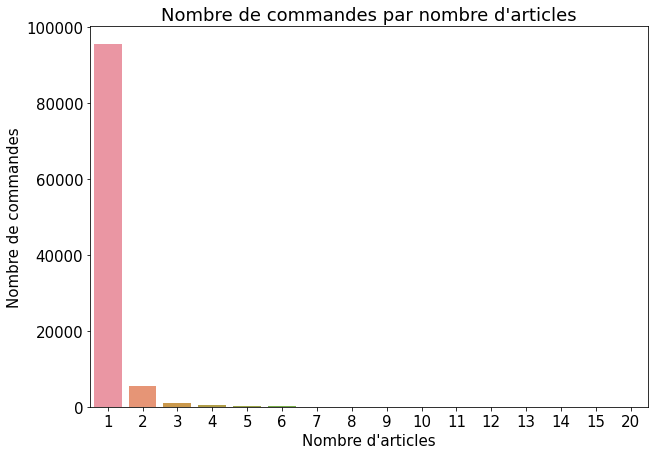

In [35]:
fig = plt.figure(figsize=(10, 7))

sns.countplot(data=df_order_it_group_dup, x="quantity")

plt.title("Nombre de commandes par nombre d'articles")
plt.xlabel("Nombre d'articles")
plt.ylabel("Nombre de commandes")
None
plt.savefig("Nombre de commandes par nombre d'articles", dpi=200, bbox_inches='tight')


La majorité de commandes est composée d'un seul article

### Distribution du prix des produits

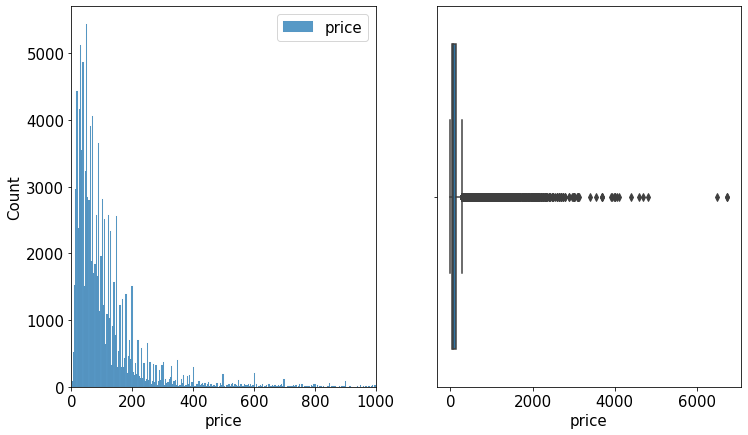

In [37]:
fig = plt.figure(1, figsize=(12, 7))

# Histogramme prix item
plt.subplot(121)

sns.histplot(df_orders_it["price"], label="price")
plt.legend()
# x-axis limits
plt.xlim([0, 1000])

# Boxplot  prix item
plt.subplot(122)
sns.boxplot(x = df_orders_it["price"])#, showfliers=False)
plt.savefig("Distribution du prix des produits", dpi=200, bbox_inches='tight')

In [38]:
df_order_it_group_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             102425 non-null  object 
 1   product_id           102425 non-null  object 
 2   quantity             102425 non-null  int64  
 3   seller_id            102425 non-null  object 
 4   shipping_limit_date  102425 non-null  object 
 5   price                102425 non-null  float64
 6   freight_value        102425 non-null  float64
 7   payment              102425 non-null  float64
 8   freight              102425 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 7.0+ MB


## Paiments

In [39]:
df_payments = pd.read_csv("olist_order_payments_dataset.csv")

In [40]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


payment_sequential : Si plusieurs méthodes de paiement appliquées, une ligne est créée par moyen utilisé.  
payment_installments : Nombre de versements=paiement échelonné     
payment_type	: type de paiement utilise (credit card, cash, etc)


In [41]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


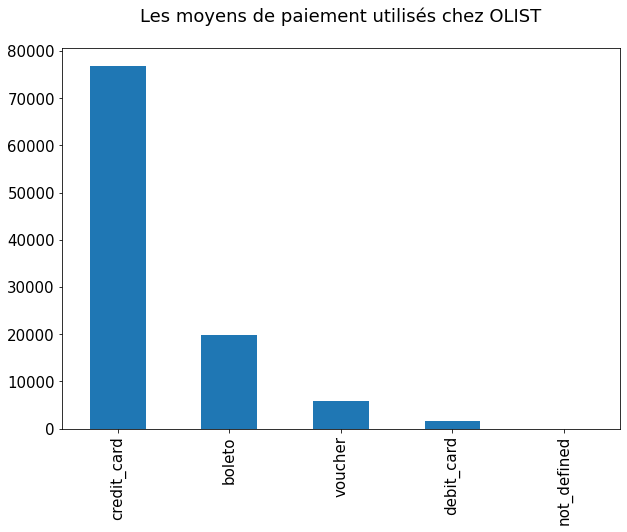

In [42]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes()

df_payments['payment_type'].value_counts().plot(kind='bar')
ax.set_xlabel("")
ax.set_ylabel("")
plt.title("Les moyens de paiement utilisés chez OLIST\n")
plt.savefig("moyens de paiement utilisés", dpi=200, bbox_inches='tight')

Le paiement par carte de crédit est le moyen le plus utilisé suivi par Boleto qui est un moyen de paiement en espèce. Le voucher est un bon de commande


In [43]:
df_payments['payment_type'].value_counts()*100/len(df_payments)

credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: payment_type, dtype: float64

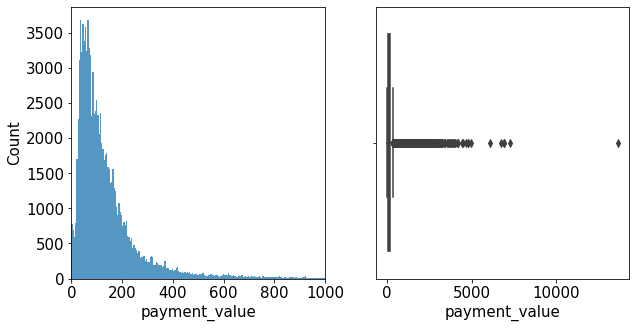

In [44]:
fig = plt.figure(1, figsize=(10, 5))
# Histogramme de "payment_value"
plt.subplot(1, 2, 1)
sns.histplot(x=df_payments["payment_value"])
# x-axis limits
plt.xlim([0, 1000])

# # Boxplot de "payment_value"
plt.subplot(1, 2, 2)
sns.boxplot(x = df_payments["payment_value"])

plt.savefig("Distribution du paiement", dpi=200, bbox_inches='tight')

In [45]:
df_payments[df_payments['order_id'].duplicated(keep=False)].sort_values(by='order_id').head(15)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
80856,0016dfedd97fc2950e388d2971d718c7,2,voucher,1,17.92
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
20036,002f19a65a2ddd70a090297872e6d64e,1,voucher,1,44.11
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
30155,0071ee2429bc1efdc43aa3e073a5290e,2,voucher,1,92.44
10244,0071ee2429bc1efdc43aa3e073a5290e,1,voucher,1,100.00
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
15298,009ac365164f8e06f59d18a08045f6c4,6,voucher,1,4.17
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45
285,009ac365164f8e06f59d18a08045f6c4,5,voucher,1,8.75


On a des doublons 'order_id' correspondant aux différents types de paiements. On va créer une nouvelle variable qui est le nombre total de moyens de paiement utilisé (nb_payment_type) et une variable qui est le nombre de versements effectués par order_id (tot_payment_installment)    
A noter que le simple utilisation d'un voucher dans la commande implique la création d'une payment_installments (plus le versment effectué par moyen de paiement principal) ce qui donne plusieurs versements alors qu'en vrai c'est un paiement total a l'achat. En plus, l'utilisation de différents bons de commandes aussi s'affiche comme différent type de moyen de paiement via 'payment_sequential' (exemple ci-dessus)


In [46]:
group_payment = df_payments.groupby(by='order_id', as_index=False).agg(nb_payment_type = ('payment_sequential', 'count'),
                                                    tot_payment_installment = ('payment_installments', 'sum'),
                                                    payment_value = ('payment_value', 'sum') )

group_payment

,order_id,nb_payment_type,tot_payment_installment,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,3,218.04
...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,1,1,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,1,1,386.53
99437,fffce4705a9662cd70adb13d4a31832d,1,3,116.85
99438,fffe18544ffabc95dfada21779c9644f,1,3,64.71


## Reviews

In [47]:
df_reviews = pd.read_csv("olist_order_reviews_dataset.csv")

In [48]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Les reviews sont en espagnols donc on se base sur le score uniquement.

In [49]:
df_reviews[df_reviews['order_id'].duplicated(keep=False)].sort_values(by='order_id').head(15)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
25612,89a02c45c340aeeb1354a24e7d4b2c1e,0035246a40f520710769010f752e7507,5,NaN,NaN,2017-08-29 00:00:00,2017-08-30 01:59:12
22423,2a74b0559eb58fc1ff842ecc999594cb,0035246a40f520710769010f752e7507,5,NaN,Estou acostumada a comprar produtos pelo barat...,2017-08-25 00:00:00,2017-08-29 21:45:57
22779,ab30810c29da5da8045216f0f62652a2,013056cfe49763c6f66bda03396c5ee3,5,NaN,NaN,2018-02-22 00:00:00,2018-02-23 12:12:30
68633,73413b847f63e02bc752b364f6d05ee9,013056cfe49763c6f66bda03396c5ee3,4,NaN,NaN,2018-03-04 00:00:00,2018-03-05 17:02:00
854,830636803620cdf8b6ffaf1b2f6e92b2,0176a6846bcb3b0d3aa3116a9a768597,5,NaN,NaN,2017-12-30 00:00:00,2018-01-02 10:54:06
83224,d8e8c42271c8fb67b9dad95d98c8ff80,0176a6846bcb3b0d3aa3116a9a768597,5,NaN,NaN,2017-12-30 00:00:00,2018-01-02 10:54:47
17582,017f0e1ea6386de662cbeba299c59ad1,02355020fd0a40a0d56df9f6ff060413,1,NaN,ja reclamei varias vezes e ate hoje não sei on...,2018-03-29 00:00:00,2018-03-30 03:16:19
89888,0c8e7347f1cdd2aede37371543e3d163,02355020fd0a40a0d56df9f6ff060413,3,NaN,UM DOS PRODUTOS (ENTREGA02) COMPRADOS NESTE PE...,2018-03-21 00:00:00,2018-03-22 01:32:08
55137,61fe4e7d1ae801bbe169eb67b86c6eda,029863af4b968de1e5d6a82782e662f5,4,NaN,NaN,2017-07-19 00:00:00,2017-07-20 12:06:11
37911,04d945e95c788a3aa1ffbee42105637b,029863af4b968de1e5d6a82782e662f5,5,NaN,NaN,2017-07-14 00:00:00,2017-07-17 13:58:06


Ca correspond au meme commande mais produits différents. on ne peut pas faire un lien avec product_id lors de merge malheureusement

In [50]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


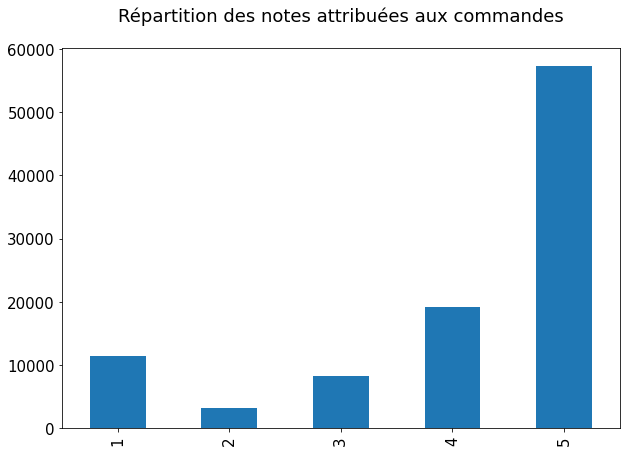

In [51]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes()

df_reviews['review_score'].value_counts().sort_index(axis=0).plot(kind='bar')
ax.set_xlabel("")
ax.set_ylabel("")
plt.title("Répartition des notes attribuées aux commandes\n")
plt.savefig('Répartition des notes attribuées aux commandes', dpi=200, bbox_inches='tight') 

Dominance de la note 5 ==> clients satisfaits

## Orders

In [52]:
df_orders = pd.read_csv("olist_orders_dataset.csv")

In [53]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [54]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [56]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])

### Evolution du nombre de commandes passées par jour sur OLIST sur toute la periode existante du fichier (2016-2018)

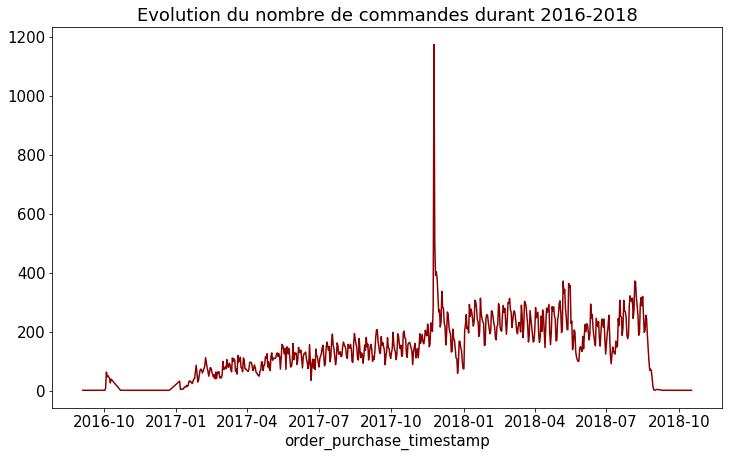

In [57]:
orders_date = df_orders.groupby(df_orders['order_purchase_timestamp'].dt.date)["order_id"].count()

fig, ax= plt.subplots()

ax=orders_date.plot(figsize=(12,7), color='darkred')
plt.title('Evolution du nombre de commandes durant 2016-2018')

plt.savefig('Evolution du nombre de commandes durant 2016-2018', dpi=200, bbox_inches='tight') 



In [58]:
print(f"Un grand pic de commande a la date {orders_date.idxmax(axis = 0)}")
print(f"Et tres peu de commande entre sep 2016 et janvier 2017 et a partir de septembre 2018 ")
            

Un grand pic de commande a la date 2017-11-24
Et tres peu de commande entre sep 2016 et janvier 2017 et a partir de septembre 2018 


Le pic de commande correspond a la date du black Friday 2017. Probablement lies aux promotions importantes de ce jour.

### Evolution du nombre de clients chez olist

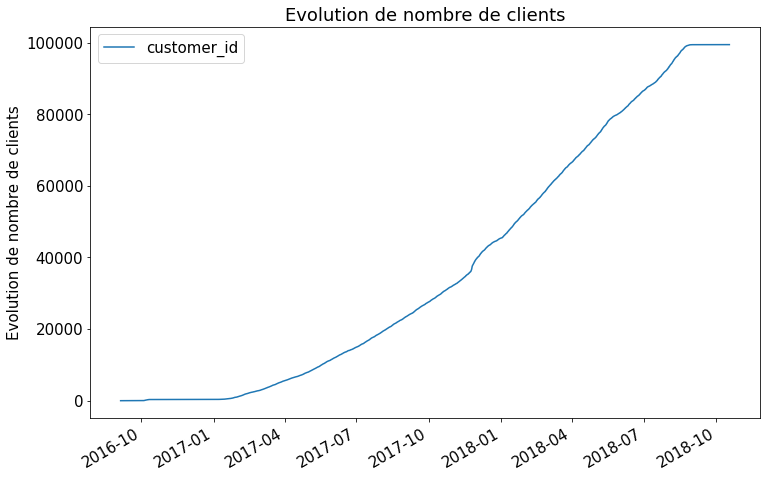

In [62]:
df_customer_dly = df_orders.groupby('customer_id',as_index=False).agg({'order_purchase_timestamp': 'min'})

df_customer_dly.groupby('order_purchase_timestamp').count().cumsum().plot(figsize=(12,8))
plt.title('Evolution de nombre de clients')

plt.xlabel('')
plt.ylabel('Evolution de nombre de clients');
plt.savefig('Evolution de nombre de clients', dpi=200, bbox_inches='tight') 


Evolution normale tendance a la hausse legerement exponentiel, et pas de pic apparente lors du black friday

### Répartition des commandes par mois de l'année

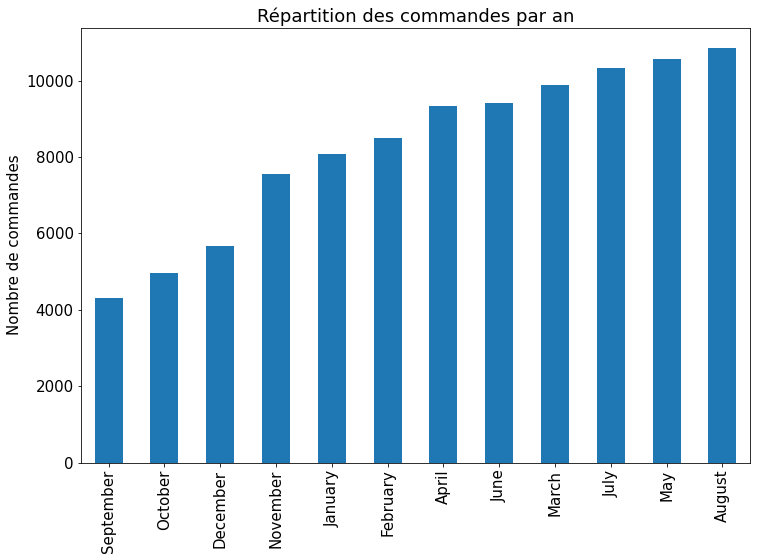

In [63]:
month_purchase = df_orders['order_purchase_timestamp'].dt.month_name()
df_orders.groupby(month_purchase)["order_id"].nunique().sort_values().plot(figsize = (12,8), kind="bar", 
          title = "Répartition des commandes par an", ylabel = "Nombre de commandes", xlabel="")

plt.savefig('Répartition des commandes par an', dpi=200, bbox_inches='tight')



Le nombre de commandes est le plus élevé durant les mois d'été et du printemps et pas pendant les périodes des fetes (décembre, janvier soldes, etc). Pourtant les catégories de produits les plus vendus ne sont pas liées aux saisons (a part sport_leisure ). Il serait interessant de voir les pourcentages de chaque catégorie mis en vente (via sellers) mais nous n'avons pas cette information.   


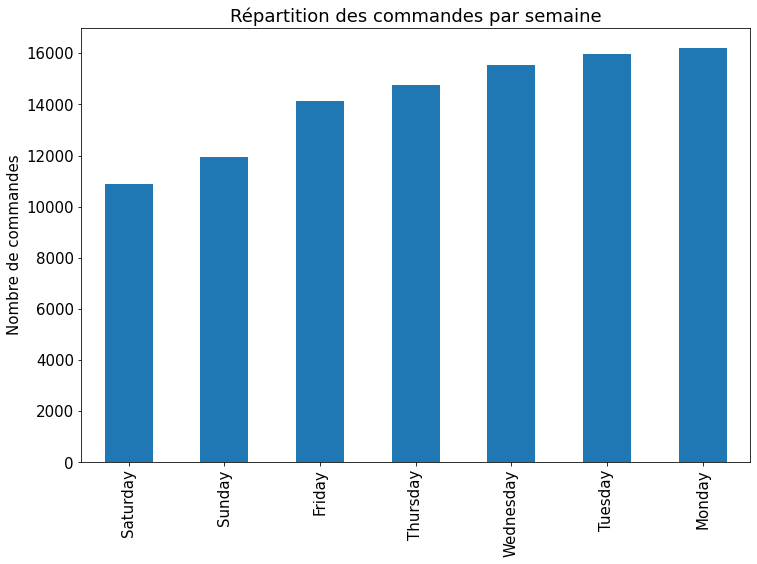

In [64]:
purchased_day = df_orders['order_purchase_timestamp'].dt.day_name()
df_orders.groupby(purchased_day)["order_id"].nunique().sort_values().plot(figsize = (12,8), kind="bar", 
          title = "Répartition des commandes par semaine", ylabel = "Nombre de commandes", xlabel="")

plt.savefig('Répartition des commandes par semaine', dpi=200, bbox_inches='tight')


Les bresiliens preferent faire la fete le weekend et passent leurs commandes les jours de la semaine et le taux baisse de plus en plus quand on s'approche de weekend!    


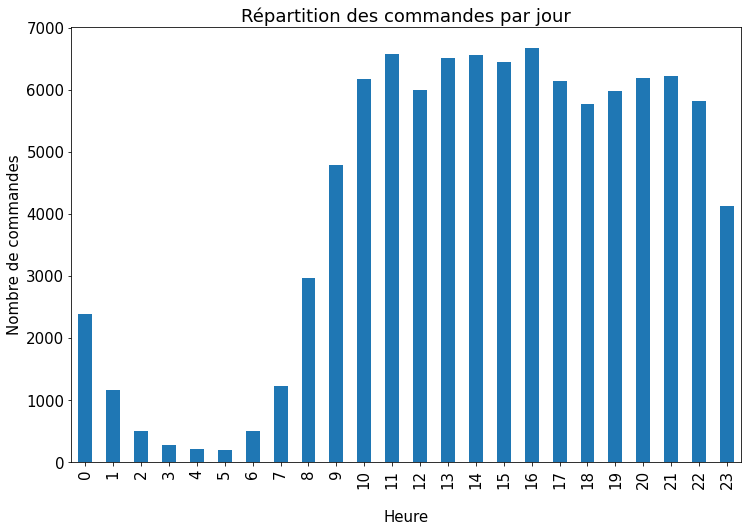

In [65]:
hour_purchase = df_orders['order_purchase_timestamp'].dt.hour
df_orders.groupby(hour_purchase)["order_id"].nunique().plot(figsize=(12,8), kind="bar", 
          title = "Répartition des commandes par jour", ylabel = "Nombre de commandes", xlabel="\nHeure")
plt.savefig('Répartition des commandes par jour', dpi=200, bbox_inches='tight')

  
Sans surprise, il y a moins de commandes passees apres minuit et tot le matin. Pour le reste de la journee et la soirée il n'y a pas une heure de preference apparente pour passer les commandes (pause dejeuner par exemple ou debut de soiree). Une legere maximum vers 11h00 et vers 16h00



### Délai de livraison 


In [66]:
df_orders['delivery_time_days'] = ((df_orders['order_delivered_customer_date'])-(df_orders['order_purchase_timestamp'])).dt.days


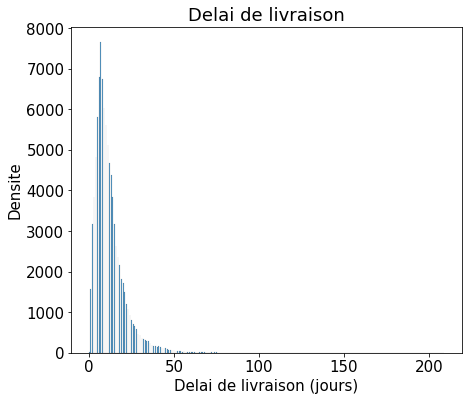

In [67]:
plt.figure(figsize=(7, 6))

sns.histplot(df_orders['delivery_time_days'].dropna(), label='Delai de livraison (jours)') 
plt.title("Delai de livraison")
plt.xlabel("Delai de livraison (jours)")
plt.ylabel("Densite")

plt.savefig('Distribution Delai de livraison', dpi=200, bbox_inches='tight')


In [68]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2.0


In [102]:
df_orders.loc[df_orders['order_status']=='delivered'].sort_values(by='order_purchase_timestamp', ascending = False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days
88097,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05 00:00:00,1.0
69678,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03 00:00:00,1.0
31486,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11 00:00:00,1.0
30077,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04 00:00:00,1.0
99369,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29 12:25:59,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30 22:48:27,2018-09-03 00:00:00,1.0
...,...,...,...,...,...,...,...,...,...
88472,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23 00:00:00,27.0
97979,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29 00:00:00,30.0
28424,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07 00:00:00,24.0
93285,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27 00:00:00,23.0


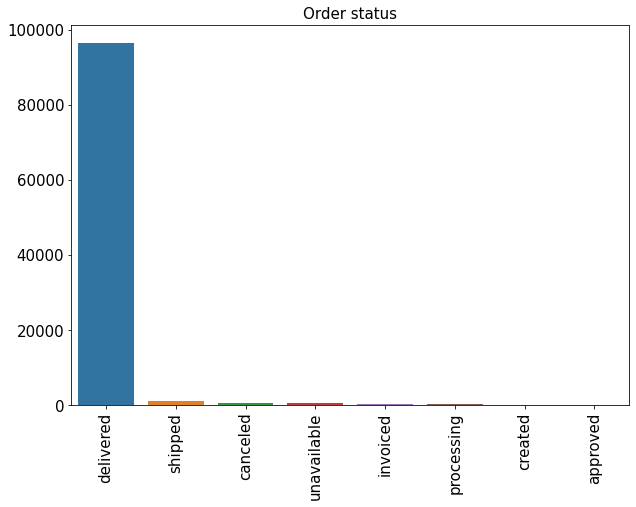

In [70]:
# Nombre de commandes par statuts d'achats

fig = plt.figure(figsize=(10, 7))
order_status = df_orders["order_status"].value_counts()
sns.barplot(x = order_status.index, y = order_status.values)
plt.title("Order status", fontsize=15)
plt.xticks(rotation=90)
plt.savefig('Distribution order_status', dpi=200, bbox_inches='tight')

In [105]:

order_status_perc = len(df_orders.loc[df_orders["order_status"]=='delivered'])*100/len(df_orders)
order_status_perc

97.02034372140264

### 97% des commandes ont le status livrés. on s'intéresse donc aux commandes livrées qui sont évaluées ensuite. 

## Produits

In [71]:
df_products = pd.read_csv("olist_products_dataset.csv")

In [72]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [73]:
list_prod = df_products['product_category_name'].unique().tolist()

Est ce que les carcteristiques des produits (longueur, poinds, etc) affectent leurs ventes?==> Creation de la variable volume.  
Est ce que la descritption des produits (product_description_lenght, product_photos_qty) affectent leurs ventes? 

In [74]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### <font color='red'> Il y a des valeurs manquantes : product_category_name:

In [75]:

df_products['product_category_name'].isna().sum()

610

## Product name translation

In [76]:
df_products_en = pd.read_csv("product_category_name_translation.csv")

In [77]:
df_products_en.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [78]:
df_products_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


### merge product translation dans product

In [79]:
# verifions si on a les memes produits dans les 2 tables

list_prod_trans = df_products_en['product_category_name'].unique().tolist()
same_prod = set(list_prod) & set(list_prod_trans)
not_in_list = [x for x in list_prod if x not in same_prod]
not_in_list


[nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos']

portateis_cozinha_e_preparadores_de_alimentos=portable_food_processor

#### 2 produits sans transalation+610 valeurs manquantes dans le fichier product

In [80]:
df_prod = df_products_en.merge(df_products, 
                    how="right",
                    on="product_category_name")

print(df_prod.shape)
df_prod.head(3)

(32951, 10)


,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,perfumaria,perfumery,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,artes,art,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,esporte_lazer,sports_leisure,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [81]:
# remplacer les 2 valeurs manquantes dans la traduction par leur traduction en anglais

df_prod.loc[df_prod.product_category_name=='portateis_cozinha_e_preparadores_de_alimentos', "product_category_name_english"] = "portable_food_processor"

df_prod.loc[df_prod.product_category_name=='pc_gamer', "product_category_name_english"] = "pc_gamer"

In [82]:
# creation volume produit et drop (length, hight width)

df_prod['vol/cm3'] = df_prod['product_length_cm']*df_prod['product_height_cm']*df_prod['product_width_cm']


In [83]:
to_drop = ["product_category_name", "product_length_cm","product_height_cm","product_width_cm"]
                      
df_prod.drop(to_drop, axis=1, inplace=True)

In [84]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_category_name_english  32341 non-null  object 
 1   product_id                     32951 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   vol/cm3                        32949 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.0+ MB


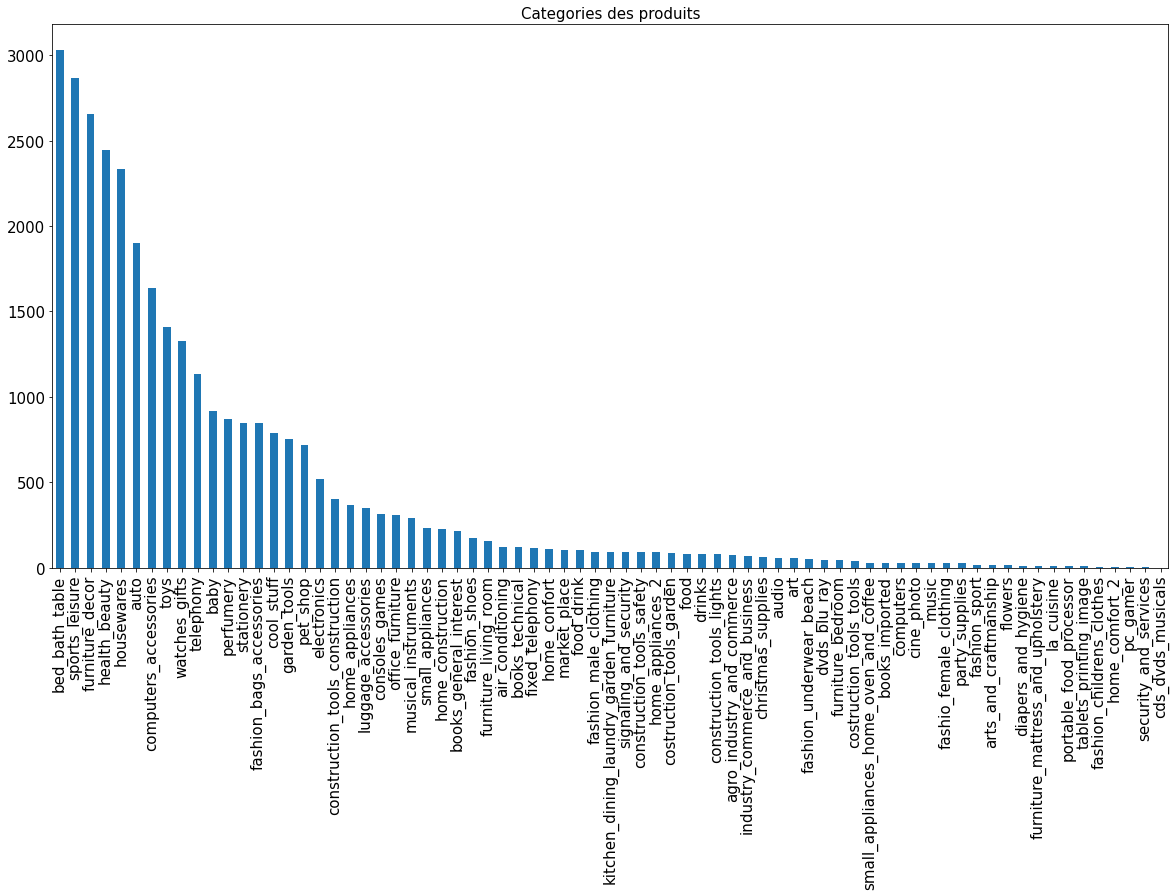

In [86]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

df_prod['product_category_name_english'].value_counts().sort_values(ascending=False).plot(kind='bar')
ax.set_xlabel("")
ax.set_ylabel("")
plt.title(f"Categories des produits", fontsize=15)
plt.savefig('barplot categories products', dpi=200, bbox_inches='tight')

### Il y a donc 73 categories dont les 5 premiers representent la majorite des ventes

### merge prod avec commandes clients (commun product_id)

In [87]:

print(f"product_id count in order table: {len(df_order_it_group_dup['product_id'].unique())} \n\
product_id count in product table: {len(df_prod['product_id'].unique())}")

print(df_prod['product_id'].equals(df_order_it_group_dup['product_id']))

list_prod_order=df_order_it_group_dup['product_id'].unique().tolist()
list_prod_id=df_prod['product_id'].unique().tolist()
same_prod= set(list_prod_id) & set(list_prod_order)
not_in_list = [x for x in list_prod_order if x not in same_prod]
not_in_list



print(df_order_it_group_dup['product_id'].isin(df_prod['product_id']).value_counts())
print(df_prod['product_id'].isin(df_order_it_group_dup['product_id']).value_counts())

product_id count in order table: 32951 
product_id count in product table: 32951
False
True    102425
Name: product_id, dtype: int64
True    32951
Name: product_id, dtype: int64


In [88]:
# merge prod avec commandes clients cad placee (commun product_id)
df_prod_order_it = df_order_it_group_dup.merge(df_prod, 
                    how="right",
                    on="product_id")
df_prod_order_it.head()

,order_id,product_id,quantity,seller_id,shipping_limit_date,price,freight_value,payment,freight,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,vol/cm3
0,e17e4f88e31525f7deef66779844ddce,1e9e8ef04dbcff4541ed26657ea517e5,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,10.91,7.39,perfumery,40.0,287.0,1.0,225.0,2240.0
1,5236307716393b7114b53ee991f36956,3aa071139cb16b67ca9e5dea641aaa2f,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,248.00,17.99,art,44.0,276.0,1.0,1000.0,10800.0
2,01f66e58769f84129811d43eefd187fb,96bd76ec8810374ed1b65e291975717f,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,79.80,7.82,sports_leisure,46.0,250.0,1.0,154.0,2430.0
3,143d00a4f2dde4e0364ee1821577adb3,cef67bcfe19066a932b7673e239eb23d,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,112.30,9.54,baby,27.0,261.0,1.0,371.0,2704.0
4,86cafb8794cb99a9b1b77fc8e48fbbbb,9dc1a7de274444849c219cff195d0b71,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,37.90,8.29,housewares,37.0,402.0,4.0,625.0,4420.0


In [89]:
df_prod_order_it.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 0 to 102424
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       102425 non-null  object 
 1   product_id                     102425 non-null  object 
 2   quantity                       102425 non-null  int64  
 3   seller_id                      102425 non-null  object 
 4   shipping_limit_date            102425 non-null  object 
 5   price                          102425 non-null  float64
 6   freight_value                  102425 non-null  float64
 7   payment                        102425 non-null  float64
 8   freight                        102425 non-null  float64
 9   product_category_name_english  100965 non-null  object 
 10  product_name_lenght            100965 non-null  float64
 11  product_description_lenght     100965 non-null  float64
 12  product_photos_qty            

### merge df_prod_order_it and orders via ordre_id :

In [90]:

print(f"order_id count in merged tables: {len(df_prod_order_it['order_id'].unique())} \n\
order_id count in orders table: {len(df_orders['order_id'].unique())}")


df_orders['order_id'].isin(df_prod_order_it['order_id']).value_counts()

order_id count in merged tables: 98666 
order_id count in orders table: 99441


True     98666
False      775
Name: order_id, dtype: int64

Il y a 775 commandes dans df_ordres qui ne sont pas dans le df_order_it et par consequent dans les 3 fichiers merges. De quoi s'agit-il?

In [91]:

df_orders[~df_orders['order_id'].isin(df_prod_order_it['order_id'])].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaT,2017-12-05 00:00:00,NaN
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaT,2018-02-16 00:00:00,NaN
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaT,2017-09-05 00:00:00,NaN
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaT,2018-02-06 00:00:00,NaN
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaT,2018-09-12 00:00:00,NaN


Ok donc ce sont des commandes annules ou sans informations. Voyons le order-status pour les 775commandes:

<AxesSubplot:>

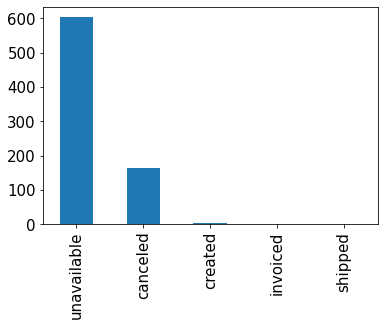

In [92]:
df_orders[~df_orders['order_id'].isin(df_prod_order_it['order_id'])]['order_status'].value_counts().plot(kind='bar')

Suppression de ces commandes qui sont annulees (nb infime qui viennent d etre crees)

In [93]:

df_orders = df_orders[df_orders['order_id'].isin(df_prod_order_it['order_id'])]

In [94]:
print(f"order_id count in merged tables: {len(df_prod_order_it['order_id'].unique())} \n\
order_id count in orders table: {len(df_orders['order_id'].unique())}")


print(df_orders['order_id'].isin(df_prod_order_it['order_id']).value_counts())
print(df_prod_order_it['order_id'].isin(df_orders['order_id']).value_counts())

order_id count in merged tables: 98666 
order_id count in orders table: 98666
True    98666
Name: order_id, dtype: int64
True    102425
Name: order_id, dtype: int64


Maintenant que nous avons les memes order_id on procede aux merges des 2 fichiers

In [95]:
df_prod_order = df_orders.merge(df_prod_order_it , 
                    how="right",
                    on="order_id")
df_prod_order.shape

(102425, 23)

In [96]:
df_prod_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,product_id,...,price,freight_value,payment,freight,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,vol/cm3
0,e17e4f88e31525f7deef66779844ddce,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,3.0,1e9e8ef04dbcff4541ed26657ea517e5,...,10.91,7.39,10.91,7.39,perfumery,40.0,287.0,1.0,225.0,2240.0
1,5236307716393b7114b53ee991f36956,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22 00:00:00,15.0,3aa071139cb16b67ca9e5dea641aaa2f,...,248.00,17.99,248.00,17.99,art,44.0,276.0,1.0,1000.0,10800.0
2,01f66e58769f84129811d43eefd187fb,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18 00:00:00,2.0,96bd76ec8810374ed1b65e291975717f,...,79.80,7.82,79.80,7.82,sports_leisure,46.0,250.0,1.0,154.0,2430.0
3,143d00a4f2dde4e0364ee1821577adb3,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08 00:00:00,3.0,cef67bcfe19066a932b7673e239eb23d,...,112.30,9.54,112.30,9.54,baby,27.0,261.0,1.0,371.0,2704.0
4,86cafb8794cb99a9b1b77fc8e48fbbbb,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26 00:00:00,2.0,9dc1a7de274444849c219cff195d0b71,...,37.90,8.29,37.90,8.29,housewares,37.0,402.0,4.0,625.0,4420.0


## merge avec client via customer_id

In [97]:
print(f"customer_id count in merged tables: {len(df_prod_order['customer_id'].unique())} \n\
customer_id count in clients table: {len(df_clients['customer_id'].unique())}")


print(df_prod_order['customer_id'].isin(df_clients['customer_id']).value_counts())

print(df_clients['customer_id'].isin(df_prod_order['customer_id']).value_counts())

customer_id count in merged tables: 98666 
customer_id count in clients table: 99441
True    102425
Name: customer_id, dtype: int64
True     98666
False      775
Name: customer_id, dtype: int64


In [98]:
df_clients[~df_clients['customer_id'].isin(df_prod_order['customer_id'])]['customer_unique_id'].nunique()

761

Suppression de ces clients qui n'ont pas passe des commandes

In [99]:

df_clients=df_clients[df_clients['customer_id'].isin(df_prod_order['customer_id'])]

In [100]:
df_prod_order_cust= df_prod_order.merge(df_clients, 
                    how="right",
                    on="customer_id")
df_prod_order_cust.shape

(102425, 27)

### Merge with payment

In [101]:
print(f"customer_id count in merged tables: {len(df_prod_order_cust['order_id'].unique())} \n\
customer_id count in clients table: {len(group_payment['order_id'].unique())}")


print(df_prod_order_cust['order_id'].isin(group_payment['order_id']).value_counts())

print(group_payment['order_id'].isin(df_prod_order_cust['order_id']).value_counts())

customer_id count in merged tables: 98666 
customer_id count in clients table: 99440
True     102424
False         1
Name: order_id, dtype: int64
True     98665
False      775
Name: order_id, dtype: int64


In [102]:
group_payment[~group_payment['order_id'].isin(df_prod_order_cust['order_id'])]

,order_id,nb_payment_type,tot_payment_installment,payment_value
24,0010dedd556712d7bb69a19cb7bbd37a,1,1,111.12
229,00a500bc03bc4ec968e574c2553bed4b,1,8,555.99
251,00b1cb0320190ca0daa2c88b35206009,1,1,0.00
271,00bca4adac549020c1273714d04d0208,1,3,111.30
309,00d0ffd14774da775ac832ba8520510f,1,5,134.49
...,...,...,...,...
98608,fdcca0e15a4d03e3fb89fb14664a3744,1,2,29.59
98635,fddbd183387b5c9bcbafbd0fe965301f,1,1,40.00
98897,fe87d4b944748f63ca5ed22cc55b6fb6,1,1,173.68
98956,feae5ecdf2cc16c1007741be785fe3cd,1,1,68.53


In [103]:
group_payment=group_payment[group_payment['order_id'].isin(df_prod_order_cust['order_id'])]

In [104]:
df_prod_order_cust_pay= df_prod_order_cust.merge(group_payment, 
                    how="left",
                    on="order_id")
df_prod_order_cust_pay.shape

(102425, 30)

In [105]:
df_prod_order_cust_pay.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,product_id,...,product_photos_qty,product_weight_g,vol/cm3,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,nb_payment_type,tot_payment_installment,payment_value
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,8.0,a9516a079e37a9c9c36b9b78b10169e8,...,1.0,8683.0,107136.0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1.0,2.0,146.87
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,16.0,4aa6014eceb682077f9dc4bffebc05b0,...,3.0,10150.0,53400.0,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1.0,8.0,335.48
2,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,26.0,bd07b66896d6f1494f5b86251848ced7,...,1.0,8267.0,45968.0,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1.0,7.0,157.73
3,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,14.0,a5647c44af977b148e0a3a4751a09e2e,...,1.0,12160.0,79968.0,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1.0,1.0,173.30
4,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,11.0,9391a573abe00141c56e38d84d7d5b3b,...,1.0,5200.0,23625.0,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1.0,8.0,252.25


### merge avec reviews

In [106]:
print(f"order_id count in merged tables: {len(df_prod_order_cust_pay['order_id'].unique())} \n\
order_id count in reviews table: {len(df_reviews['order_id'].unique())}")


print(df_reviews['order_id'].isin(df_prod_order_cust_pay['order_id']).value_counts())

print(df_prod_order_cust_pay['order_id'].isin(df_reviews['order_id']).value_counts())

order_id count in merged tables: 98666 
order_id count in reviews table: 98673
True     98465
False      759
Name: order_id, dtype: int64
True     101628
False       797
Name: order_id, dtype: int64


In [107]:
df_prod_order[~df_prod_order_cust_pay['order_id'].isin(df_reviews['order_id'])].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,product_id,...,price,freight_value,payment,freight,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,vol/cm3
18,e04227003e31c861c6d5953a9ecaffb9,1d99106cca82c25870ca45588226c83d,delivered,2018-06-15 14:08:12,2018-06-18 11:15:30,2018-06-18 15:16:00,2018-07-03 23:32:10,2018-07-25 00:00:00,18.0,cf55509ea8edaaac1d28fdb16e48fc22,...,207.25,18.38,207.25,18.38,musical_instruments,43.0,1827.0,3.0,250.0,2023.0
230,5c468b18e44fe58da9d5584b05fd988f,3491062b95387d22e7378f83a9866e69,delivered,2017-11-07 23:05:11,2017-11-09 05:31:33,2017-11-16 20:19:44,2017-11-28 20:43:14,2017-11-27 00:00:00,20.0,64c8f1a52b407d92518a1f8b79240a70,...,19.99,14.10,19.99,14.10,telephony,49.0,319.0,1.0,100.0,1188.0
233,f92ef153ceb4a6db2572cc8f79dff479,832e0159bea501e0a4b1ff43edae6b4d,delivered,2017-08-31 08:55:41,2017-08-31 09:05:19,2017-09-11 20:32:41,2017-09-15 16:23:01,2017-09-19 00:00:00,15.0,d8a405c732027a2af3187b031890933d,...,29.90,12.60,29.90,12.60,auto,50.0,361.0,1.0,200.0,3640.0
515,1b797eb66e743460a6dd5afa1ad3c6f6,978add3f01a3dc2ded9cbf778d5e6109,delivered,2017-04-21 20:25:02,2017-04-21 20:41:34,2017-04-25 09:56:33,2017-05-02 14:17:47,2017-05-16 00:00:00,10.0,bbaef2eadf31fe3ea6702077398be06c,...,56.99,14.57,56.99,14.57,perfumery,45.0,1003.0,2.0,400.0,2178.0
565,febcdd7967f1d7c285c2729e23af0075,451c8dd87afb50d8842438b4568af292,delivered,2017-06-07 12:59:08,2017-06-07 13:10:31,2017-06-08 13:03:36,2017-06-16 14:13:03,2017-07-03 00:00:00,9.0,bbaef2eadf31fe3ea6702077398be06c,...,56.99,14.15,56.99,14.15,perfumery,45.0,1003.0,2.0,400.0,2178.0


ceci correspond aux commandes sans reviews. rien de special. Par contre, les commandes avec reviews mais qui ne sont pas dans le fichier des commandes, ca c'est pas normal!

In [108]:
# supprimer les order_id evaluee mais qui ne sont pas dans les fichiers des commandes

df_reviews = df_reviews[df_reviews['order_id'].isin(df_prod_order_cust_pay['order_id'])]

In [109]:
print(f"order_id count in merged tables: {len(df_prod_order_cust_pay['order_id'].unique())} \n\
order_id count in reviews table: {len(df_reviews['order_id'].unique())}")


print(df_reviews['order_id'].isin(df_prod_order_cust_pay['order_id']).value_counts())

print(df_prod_order_cust_pay['order_id'].isin(df_reviews['order_id']).value_counts())

order_id count in merged tables: 98666 
order_id count in reviews table: 97917
True    98465
Name: order_id, dtype: int64
True     101628
False       797
Name: order_id, dtype: int64


In [110]:
df_prod_order_cust_pay_rev = df_prod_order_cust_pay.merge(df_reviews, 
                    how="right",
                    on="order_id")
df_prod_order_cust_pay_rev.shape

(102230, 36)

In [146]:
df_prod_order_cust_pay_rev.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,product_id,...,customer_state,nb_payment_type,tot_payment_installment,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,73fc7af87114b39712e6da79b0a377eb,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,6.0,fd25ab760bfbba13c198fa3b4f1a0cd3,...,SP,1.0,8.0,397.26,7bc2406110b926393aa56f80a40eba40,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,a548910a1c6147796b98fdf73dbeba33,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00,9.0,be0dbdc3d67d55727a65d4cd696ca73c,...,SP,1.0,1.0,88.09,80e641a11e56f04c1ad469d5645fdfde,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,f9e4b658b201a9f2ecdecbb34bed034b,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00,13.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,BA,1.0,1.0,194.12,228ce5500dc1d8e020d8d1322874b6f0,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,658677c97b385a9be170737859d3511b,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00,10.0,52c80cedd4e90108bf4fa6a206ef6b03,...,SC,1.0,1.0,222.84,e64fb393e7b32834bb789ff8bb30750e,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,8e6bfb81e283fa7e4f11123a3fb894f1,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00,18.0,3880d25d502b15b1de6fddc42ad1d67a,...,SC,1.0,10.0,1333.25,f7c4243c7fe1938f181bec41a392bdeb,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [111]:
df = df_prod_order_cust_pay_rev.copy()

In [112]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,product_id,...,customer_state,nb_payment_type,tot_payment_installment,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,73fc7af87114b39712e6da79b0a377eb,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,6.0,fd25ab760bfbba13c198fa3b4f1a0cd3,...,SP,1.0,8.0,397.26,7bc2406110b926393aa56f80a40eba40,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,a548910a1c6147796b98fdf73dbeba33,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00,9.0,be0dbdc3d67d55727a65d4cd696ca73c,...,SP,1.0,1.0,88.09,80e641a11e56f04c1ad469d5645fdfde,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,f9e4b658b201a9f2ecdecbb34bed034b,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00,13.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,BA,1.0,1.0,194.12,228ce5500dc1d8e020d8d1322874b6f0,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,658677c97b385a9be170737859d3511b,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00,10.0,52c80cedd4e90108bf4fa6a206ef6b03,...,SC,1.0,1.0,222.84,e64fb393e7b32834bb789ff8bb30750e,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,8e6bfb81e283fa7e4f11123a3fb894f1,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00,18.0,3880d25d502b15b1de6fddc42ad1d67a,...,SC,1.0,10.0,1333.25,f7c4243c7fe1938f181bec41a392bdeb,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102230 entries, 0 to 102229
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102230 non-null  object        
 1   customer_id                    102230 non-null  object        
 2   order_status                   102230 non-null  object        
 3   order_purchase_timestamp       102230 non-null  datetime64[ns]
 4   order_approved_at              102216 non-null  object        
 5   order_delivered_carrier_date   101211 non-null  object        
 6   order_delivered_customer_date  100083 non-null  datetime64[ns]
 7   order_estimated_delivery_date  102230 non-null  object        
 8   delivery_time_days             100083 non-null  float64       
 9   product_id                     102230 non-null  object        
 10  quantity                       102230 non-null  int64         
 11  

## Valeurs manquantes

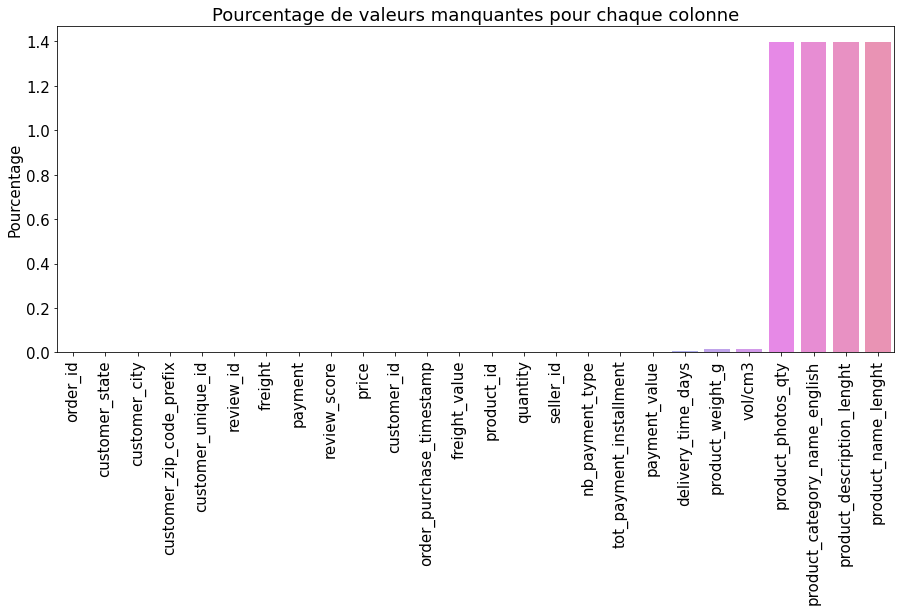

In [118]:
# Calcul des valeurs manquantes
perc_miss = df.isna().sum(axis=0).sort_values()/len(df)*100

# Affiche la proportion de données manquants par colonne
fig = plt.figure(figsize=(15, 6))
sns.barplot(x=perc_miss.index, y=perc_miss.values)
plt.ylabel("Pourcentage")
plt.title("Pourcentage de valeurs manquantes pour chaque colonne")

plt.xticks(rotation=90)
plt.savefig('Pourcentage de valeurs manquantes', dpi=200, bbox_inches='tight')
plt.show()

variables pas pertinentes :  review_comment_title, review_comment_message , review_creation_date, review_answer_timestamp  shipping_limit_date, order_approved_at, order_delivered_carrier_date, order_estimated_delivery_date,
    

In [115]:
to_drop = ['review_comment_title', 'review_comment_message' , 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date', 'order_delivered_customer_date']
df.drop(to_drop, axis=1, inplace=True)

In [116]:
# garder que les commandes livres

df = df[df['order_status']=='delivered']

In [117]:
df.drop('order_status', axis=1, inplace=True)

#### Nombre de commandes par client

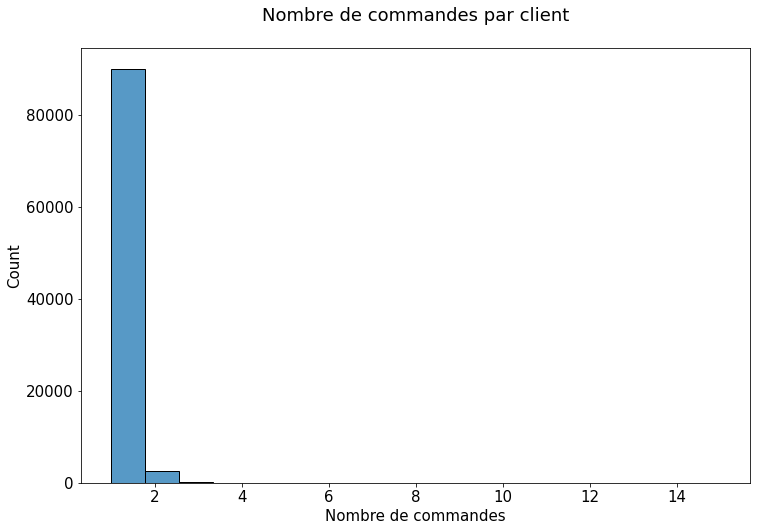

In [120]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(df.groupby("customer_unique_id").agg({"order_id": "nunique"}),
             x="order_id")

plt.xlabel("Nombre de commandes")
plt.title(f"Nombre de commandes par client\n")
plt.savefig("Nombre de commandes par client", dpi=200, bbox_inches='tight')
plt.show()

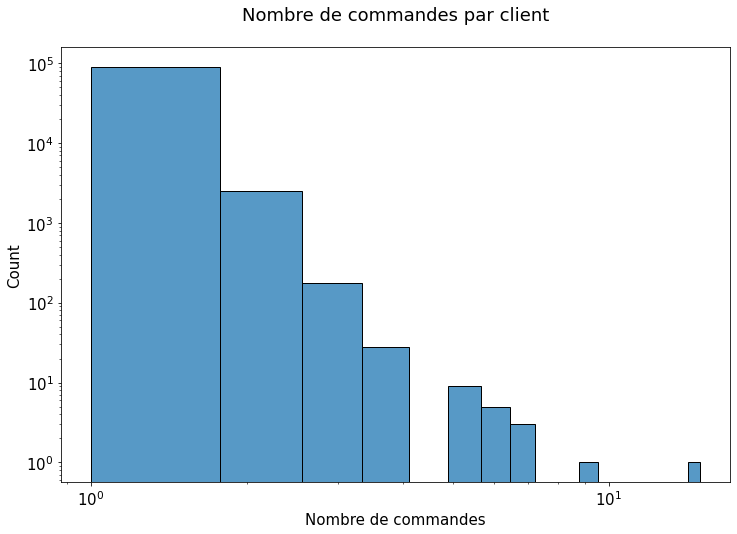

In [154]:
fig = plt.figure(figsize=(12, 8))
g = sns.histplot(df.groupby("customer_unique_id").agg({"order_id": "nunique"}),
             x="order_id")  #, log_scale=True
 
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Nombre de commandes")
plt.title(f"Nombre de commandes par client\n")

plt.savefig("Nombre de commandes par client en log", dpi=200, bbox_inches='tight')
plt.show()

In [121]:
order_cust= df.groupby("customer_unique_id").agg({"order_id": "nunique"})
order_plus=len(order_cust.loc[order_cust['order_id']>1])*100/len(order_cust)
print('--------------------------------------------------------------------------')
print(f"Seulement {round(order_plus)} % des clients ont passe plus d'une commande")
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Seulement 3 % des clients ont passe plus d'une commande
--------------------------------------------------------------------------


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100084 entries, 0 to 102229
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100084 non-null  object        
 1   customer_id                    100084 non-null  object        
 2   order_purchase_timestamp       100084 non-null  datetime64[ns]
 3   delivery_time_days             100076 non-null  float64       
 4   product_id                     100084 non-null  object        
 5   quantity                       100084 non-null  int64         
 6   seller_id                      100084 non-null  object        
 7   price                          100084 non-null  float64       
 8   freight_value                  100084 non-null  float64       
 9   payment                        100084 non-null  float64       
 10  freight                        100084 non-null  float64       
 11  

Selectionner les variables les plus pertinentes pour une premiere segmentation

In [130]:

to_keep = ['order_id', 'order_purchase_timestamp', 'product_id', 'quantity','customer_unique_id', 'customer_state', 'nb_payment_type',
        'tot_payment_installment', 'payment_value', 'review_score', 'payment', 'freight']
df_reduit = df[to_keep]

In [131]:
df_reduit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100084 entries, 0 to 102229
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  100084 non-null  object        
 1   order_purchase_timestamp  100084 non-null  datetime64[ns]
 2   product_id                100084 non-null  object        
 3   quantity                  100084 non-null  int64         
 4   customer_unique_id        100084 non-null  object        
 5   customer_state            100084 non-null  object        
 6   nb_payment_type           100083 non-null  float64       
 7   tot_payment_installment   100083 non-null  float64       
 8   payment_value             100083 non-null  float64       
 9   review_score              100084 non-null  int64         
 10  payment                   100084 non-null  float64       
 11  freight                   100084 non-null  float64       
dtypes:

### Il y a une seule valeur manquante sur 3 variables qu'on va imputer avec la moyenne de la variable

In [134]:
df_reduit['nb_payment_type'].fillna((df_reduit['nb_payment_type'].mean()), inplace=True)
df_reduit['tot_payment_installment'].fillna((df_reduit['tot_payment_installment'].mean()), inplace=True)
df_reduit['payment_value'].fillna((df_reduit['payment_value'].mean()), inplace=True)

In [135]:
df_reduit[df_reduit['customer_unique_id'].duplicated(keep=False)].sort_values(by='customer_unique_id').head(20)


,order_id,order_purchase_timestamp,product_id,quantity,customer_unique_id,customer_state,nb_payment_type,tot_payment_installment,payment_value,review_score,payment,freight
35477,44e608f2db00c74a1fe329de44416a4e,2018-02-28 11:15:41,58727e154e8e85d84052cd22b0136c84,1,00053a61a98854899e70ed204dd4bafe,PR,1.0,3.0,419.18,1,191.00,18.59
35476,44e608f2db00c74a1fe329de44416a4e,2018-02-28 11:15:41,62984ea1bba7fcea1f5b57084d3bf885,1,00053a61a98854899e70ed204dd4bafe,PR,1.0,3.0,419.18,1,191.00,18.59
1191,fd61441ba2a7b57e6342862e779b10b0,2017-09-29 14:46:58,bb15f9ba2ec6e36ab6c9e88d17430d64,1,000bfa1d2f1a41876493be685390d6d3,SP,1.0,4.0,46.85,5,35.00,11.85
89251,fd61441ba2a7b57e6342862e779b10b0,2017-09-29 14:46:58,bb15f9ba2ec6e36ab6c9e88d17430d64,1,000bfa1d2f1a41876493be685390d6d3,SP,1.0,4.0,46.85,4,35.00,11.85
35229,c6d61340bd8baeedca7cc8e7f7ec07e9,2017-08-17 19:10:33,9e572ff4654f7064419d97a891a8b0fc,1,000de6019bb59f34c099a907c151d855,SP,1.0,4.0,257.44,2,139.90,17.33
35230,c6d61340bd8baeedca7cc8e7f7ec07e9,2017-08-17 19:10:33,af0a917aec9cea3b353ece61a8825326,1,000de6019bb59f34c099a907c151d855,SP,1.0,4.0,257.44,2,89.90,10.31
65786,87440e08790d85796f5b8bc9f5ed2707,2018-07-26 09:43:52,38021cef829efa264df6f9d21c4df6e9,2,000fbf0473c10fc1ab6f8d2d286ce20c,SP,1.0,1.0,362.38,5,239.74,38.28
65787,87440e08790d85796f5b8bc9f5ed2707,2018-07-26 09:43:52,d7a3cfa08519494aa1ad181e803617ec,2,000fbf0473c10fc1ab6f8d2d286ce20c,SP,1.0,1.0,362.38,5,46.06,38.28
77993,6fc8cd5f4cfbea0b694434a10475fd6f,2017-08-17 12:55:47,8c4851c8c9bb79e51a0f3c16cb499cd7,1,001926cef41060fae572e2e7b30bd2a4,MT,1.0,1.0,91.21,4,29.89,32.99
77992,6fc8cd5f4cfbea0b694434a10475fd6f,2017-08-17 12:55:47,5d66715cc928aadd0074f61332698593,1,001926cef41060fae572e2e7b30bd2a4,MT,1.0,1.0,91.21,4,18.90,9.43


A noter que le payment_value correspond au montant total de la commande pour plusieurs items (faut pas faire la somme) et elle est egale au payment (price*quantity)+fright. Si le client a passe plusieurs commandes (et non plusieurs items separes en lignes) il faut faire la somme de payment_value. En gros, il faut faire groupby customer_id (first for exemple pour payment_value)  et ensuite faire groupby customer_unique_id. Ou tout simplement calculer somme totale (Payment+freight). 

### il reste la localisation des clients 

In [145]:
# Encodage binaire de l'état des acheteurs, Sao Paulo ou Non

df_reduit.loc[df_reduit["customer_state"] != "SP", "customer_state"] = 0
df_reduit.loc[df_reduit["customer_state"] == "SP", "customer_state"] = 1


df_reduit["customer_state"] = df_reduit["customer_state"].astype('float64')

In [146]:
df_reduit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100084 entries, 0 to 102229
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  100084 non-null  object        
 1   order_purchase_timestamp  100084 non-null  datetime64[ns]
 2   product_id                100084 non-null  object        
 3   quantity                  100084 non-null  int64         
 4   customer_unique_id        100084 non-null  object        
 5   customer_state            100084 non-null  float64       
 6   nb_payment_type           100084 non-null  float64       
 7   tot_payment_installment   100084 non-null  float64       
 8   payment_value             100084 non-null  float64       
 9   review_score              100084 non-null  int64         
 10  payment                   100084 non-null  float64       
 11  freight                   100084 non-null  float64       
dtypes:

### Matrice de corrélation

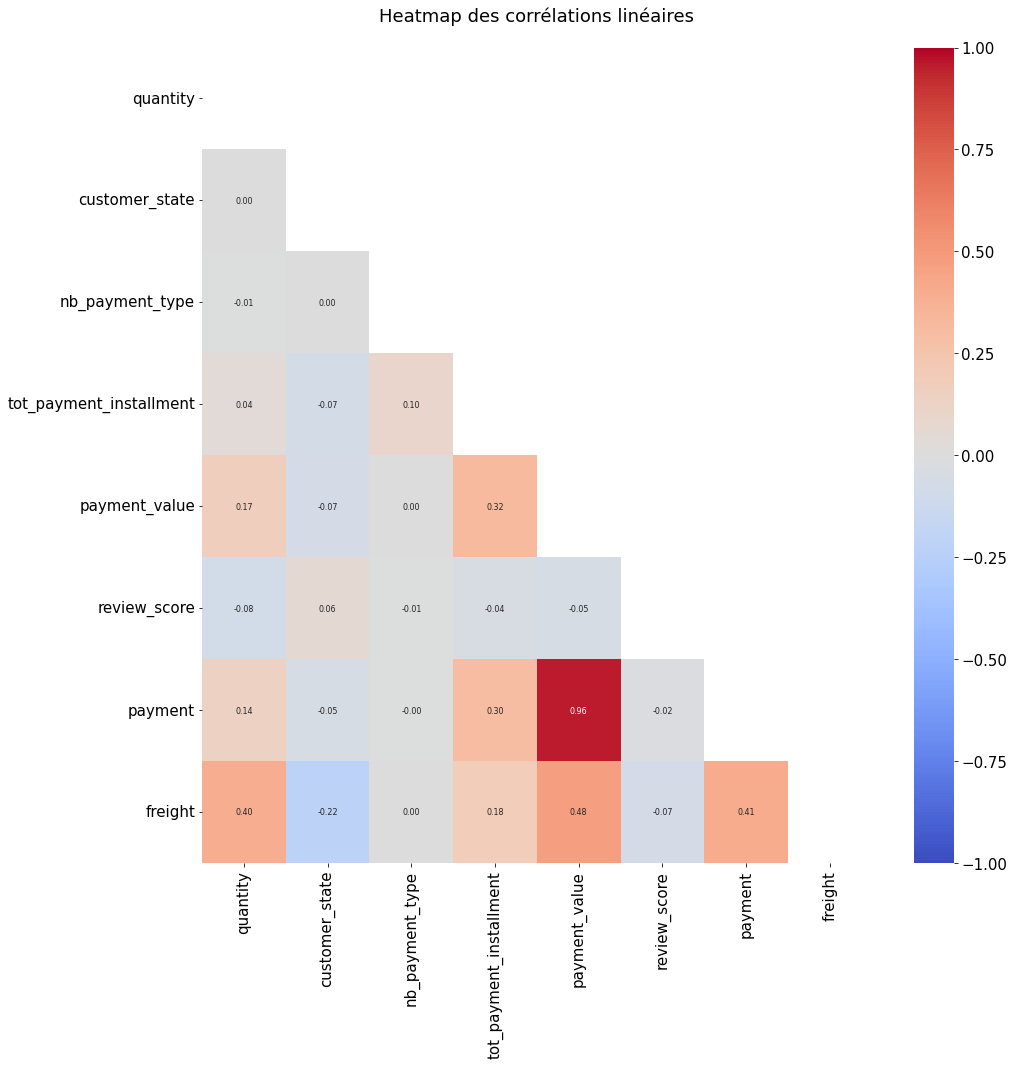

In [147]:
corr = df_reduit.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, 
                 center=0, 
                 cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")
plt.savefig("Correlation", dpi=200, bbox_inches='tight')

### Forte correlation entre Payment_value et payment. A supprimer payment value eventuellement

## Sauvegarder le fichier reduit nettoye

In [152]:
# save as csv :

df_reduit.to_csv('df_reduit.csv', index=False)
